# Data Scaling

작성자 : 오한석

참조: https://homeproject.tistory.com/3

In [147]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

## 1. What is Scaler ?

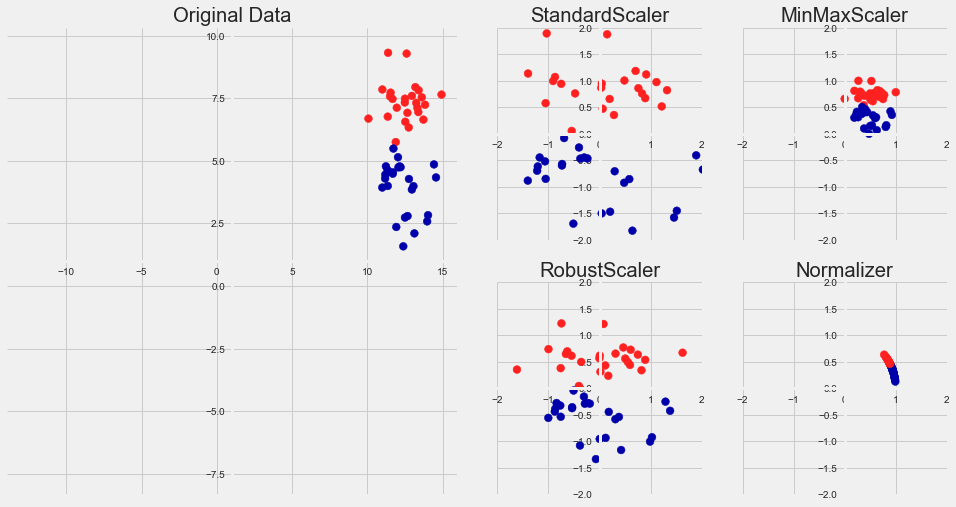

In [148]:
import mglearn
mglearn.plots.plot_scaling()

### (1) Standard Scaler

각 feature의 평균을 0, 분산을 1로 변경합니다. 모든 특성들이 같은 스케일을 갖게 됩니다.

### (2) Robust Scaler

모든 특성들이 같은 크기를 갖게 된다는 점에서 StandardScaler와 비슷하지만, 평균과 분산 대신 median과 quantile을 사용합니다. 그렇기에 이상치에 영향을 받지 않습니다.

### (3) MinMaxScaler

모든 feature가 0과 1사이에 위치하게 만듭니다.

### (4) Normalizer

각 column의 통계치를 이용하는 위 세가지 방식과 다르게, Normalizer는 row마다 각각 정규화됩니다. Normalizer는 유클리드 거리가 1이 되도록 데이터를 조정합니다. 

## 2. Code

In [149]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target,random_state=2019)

In [150]:
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [151]:
import pandas as pd
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.178845,19.361150,92.328685,659.964319,0.095889,0.104452,0.090053,0.049449,0.180356,0.062625,...,16.318160,25.708662,107.618357,884.284272,0.131940,0.255514,0.275466,0.116082,0.287586,0.083972
std,3.556247,4.277507,24.555628,357.986527,0.013470,0.052467,0.080357,0.039414,0.026729,0.006792,...,4.834136,5.984982,33.661716,569.193112,0.022695,0.155440,0.206440,0.066720,0.057954,0.017972
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.672500,16.352500,74.720000,416.825000,0.086715,0.065525,0.029505,0.020280,0.162000,0.057725,...,13.010000,21.382500,84.012500,515.825000,0.117125,0.147900,0.118975,0.065320,0.250050,0.071270
50%,13.445000,18.985000,87.090000,558.200000,0.095450,0.092525,0.064315,0.033285,0.179250,0.061455,...,15.040000,25.480000,98.135000,696.050000,0.130350,0.217300,0.237650,0.101100,0.281100,0.080195
75%,15.977500,21.832500,104.250000,790.575000,0.104475,0.131225,0.132050,0.074868,0.194875,0.066225,...,18.707500,29.622500,125.075000,1065.000000,0.145175,0.341600,0.388650,0.162725,0.317800,0.092173
max,28.110000,39.280000,188.500000,2501.000000,0.139800,0.345400,0.426400,0.187800,0.304000,0.095750,...,36.040000,49.540000,251.200000,4254.000000,0.218400,1.058000,1.105000,0.291000,0.555800,0.207500


## (1) StandardScaler code

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

In [153]:
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-2.266705e-15,-2.001268e-15,2.379943e-15,5.759608e-16,-4.231878e-15,-4.099463e-15,-4.192981e-16,1.140748e-15,3.741465e-15,7.131945e-15,...,-2.041256e-15,1.881646e-16,2.296839e-15,-1.260989e-15,6.799464e-15,-1.028390e-15,4.255855e-16,2.126624e-16,-2.576968e-15,5.011641e-16
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-1.826497e+00,-2.258909e+00,-1.810620e+00,-1.369158e+00,-3.215235e+00,-1.623359e+00,-1.121978e+00,-1.256064e+00,-2.785105e+00,-1.866922e+00,...,-1.582318e+00,-2.289858e+00,-1.580158e+00,-1.162103e+00,-2.680791e+00,-1.469976e+00,-1.335933e+00,-1.741897e+00,-2.264541e+00,-1.611680e+00
25%,-7.056012e-01,-7.041924e-01,-7.179368e-01,-6.799842e-01,-6.818646e-01,-7.428128e-01,-7.543742e-01,-7.409248e-01,-6.875519e-01,-7.222736e-01,...,-6.851378e-01,-7.236862e-01,-7.020917e-01,-6.480973e-01,-6.535324e-01,-6.931357e-01,-7.589378e-01,-7.617245e-01,-6.484448e-01,-7.075626e-01
50%,-2.065964e-01,-8.804019e-02,-2.135903e-01,-2.846028e-01,-3.263499e-02,-2.275943e-01,-3.206748e-01,-4.105800e-01,-4.143055e-02,-1.724296e-01,...,-2.647138e-01,-3.825088e-02,-2.820565e-01,-3.310925e-01,-7.012470e-02,-2.461355e-01,-1.833971e-01,-2.248204e-01,-1.120496e-01,-2.103813e-01
75%,5.063680e-01,5.784340e-01,4.860528e-01,3.652770e-01,6.381489e-01,5.108856e-01,5.232388e-01,6.456722e-01,5.438243e-01,5.307220e-01,...,4.948453e-01,6.547121e-01,5.192002e-01,3.178679e-01,5.838654e-01,5.544713e-01,5.489108e-01,6.999062e-01,5.219505e-01,4.568444e-01
max,3.921982e+00,4.662125e+00,3.921072e+00,5.148798e+00,3.263682e+00,4.597809e+00,4.190559e+00,3.514312e+00,4.631244e+00,4.883039e+00,...,4.084500e+00,3.986538e+00,4.270444e+00,5.927123e+00,3.814113e+00,5.168749e+00,4.023009e+00,2.624763e+00,4.633450e+00,6.881346e+00


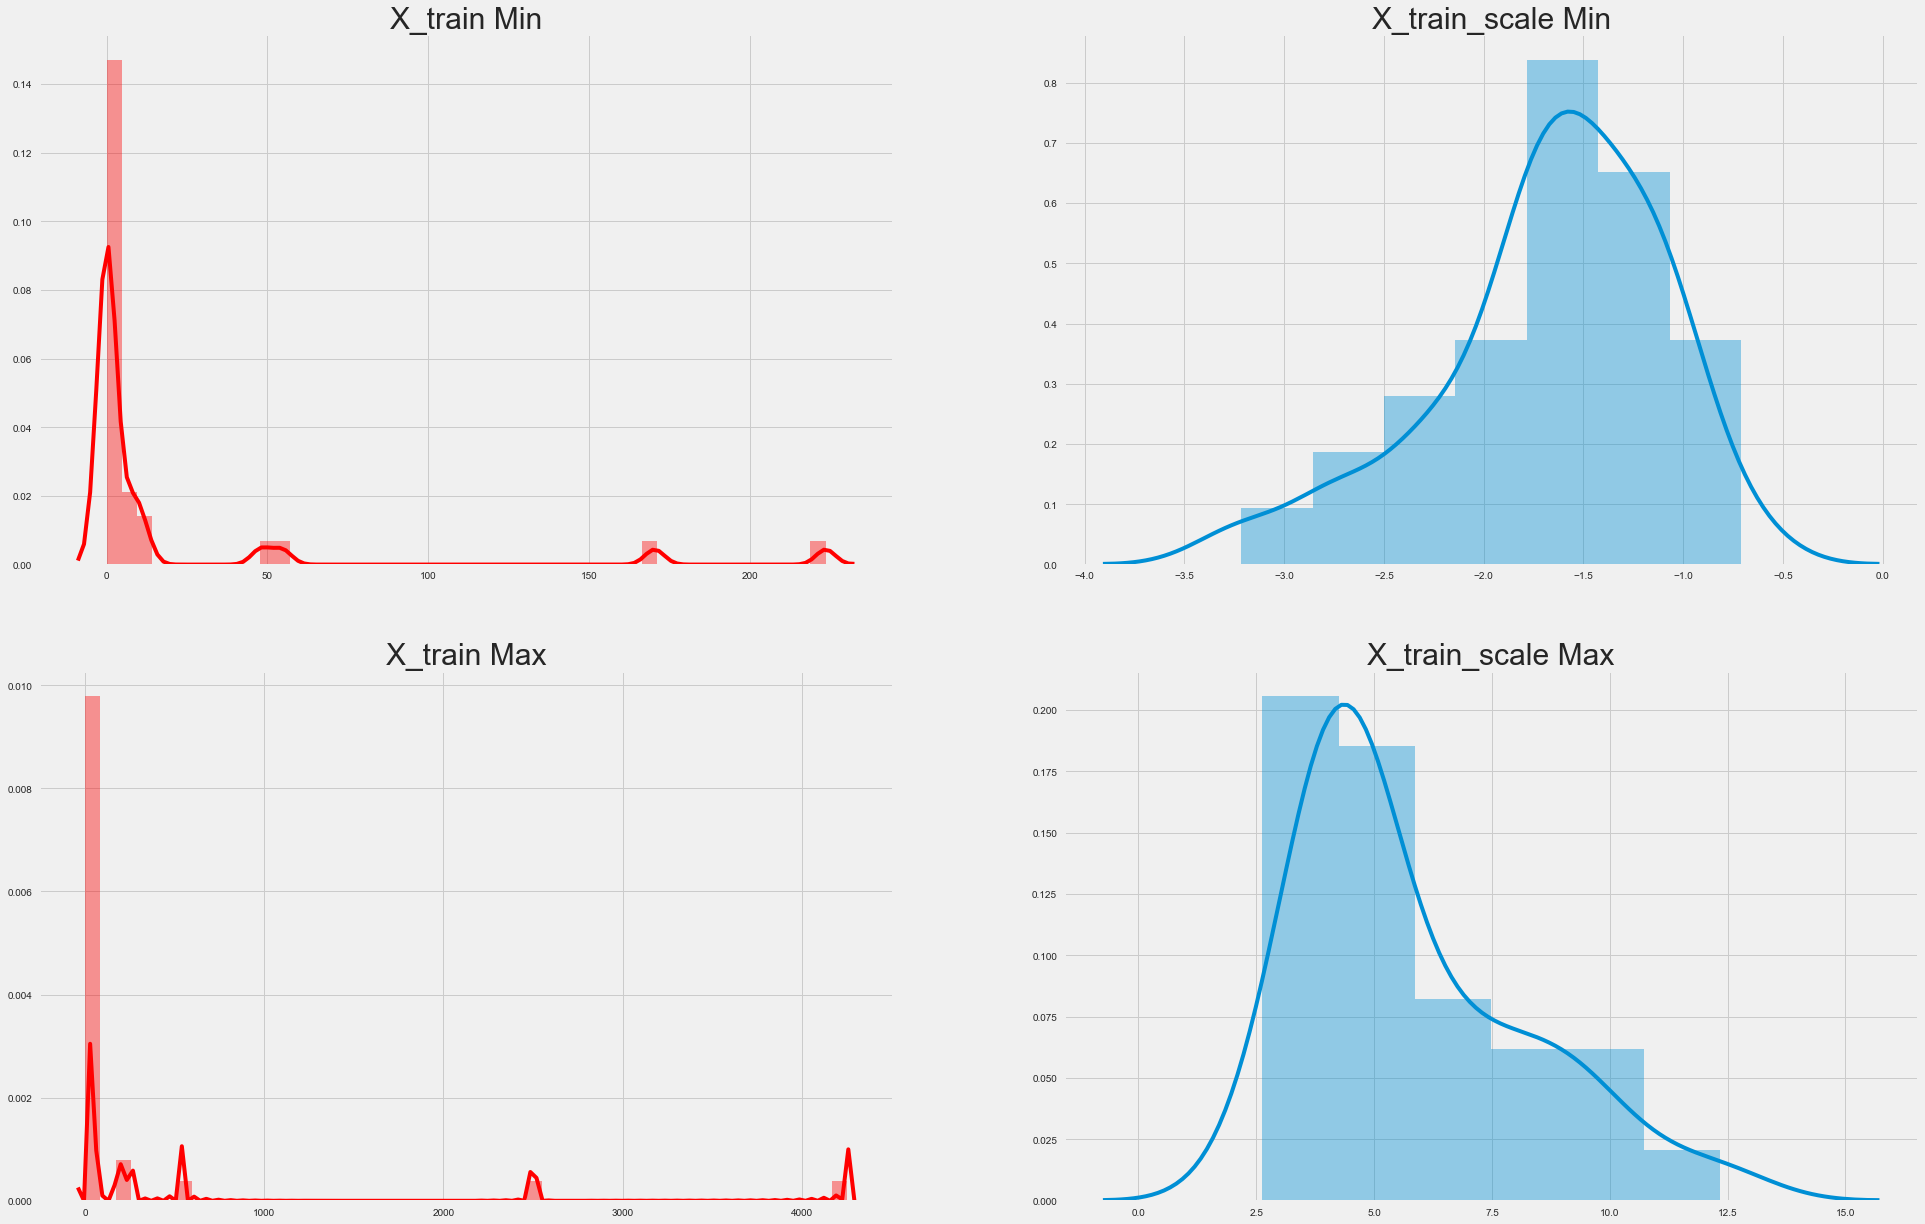

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('X_train Min',size=30)
ax2.set_title("X_train_scale Min",size=30)
ax3.set_title("X_train Max",size =30)
ax4.set_title("X_train_scale Max",size =30)
sns.distplot(X_train.min(axis=0),ax=ax1,color = 'red')
sns.distplot(X_train_scale.min(axis=0),ax=ax2)
sns.distplot(X_train.max(axis=0),ax=ax3,color ='red')
sns.distplot(X_train_scale.max(axis=0),ax=ax4)

## (2) RobustScaler Code

In [155]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()
X_train_scale = scaler.fit_transform(X_train)

In [156]:
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,426.000000,4.260000e+02,426.000000,4.260000e+02,4.260000e+02,426.000000,426.000000,426.000000,4.260000e+02,...,4.260000e+02,426.000000,4.260000e+02,4.260000e+02,426.000000,426.000000,426.000000,4.260000e+02,426.000000,4.260000e+02
mean,1.704634e-01,0.068641,1.774021e-01,0.272279,2.472323e-02,1.815383e-01,0.250995,0.296106,0.033646,1.376139e-01,...,2.243369e-01,0.027750,2.309493e-01,3.427583e-01,0.056671,0.197286,0.140228,1.538148e-01,0.095737,1.806768e-01
std,8.260736e-01,0.780567,8.315485e-01,0.957823,7.584588e-01,7.985778e-01,0.783630,0.722038,0.813054,7.990257e-01,...,8.484662e-01,0.726333,8.197678e-01,1.036451e+00,0.809098,0.802477,0.765514,6.849718e-01,0.855417,8.598161e-01
min,-1.336585e+00,-1.692518,-1.326448e+00,-1.037592,-2.411036e+00,-1.113318e+00,-0.627188,-0.609755,-2.228137,-1.352353e+00,...,-1.116630e+00,-1.633495,-1.062892e+00,-8.602904e-01,-2.109804,-0.980950,-0.881246,-1.037934e+00,-1.839114,-1.203445e+00
25%,-4.117305e-01,-0.480383,-4.188960e-01,-0.378261,-4.918356e-01,-4.109589e-01,-0.339461,-0.238241,-0.524715,-4.388235e-01,...,-3.562966e-01,-0.497269,-3.439269e-01,-3.281741e-01,-0.471480,-0.358286,-0.440067,-3.673323e-01,-0.458303,-4.269824e-01
50%,-2.062153e-16,0.000000,-2.406929e-16,0.000000,-3.903128e-16,1.056013e-16,0.000000,0.000000,0.000000,4.080937e-16,...,1.557999e-16,0.000000,1.730387e-16,1.036497e-16,0.000000,0.000000,0.000000,7.123208e-17,0.000000,3.319556e-16
75%,5.882695e-01,0.519617,5.811040e-01,0.621739,5.081644e-01,5.890411e-01,0.660539,0.761759,0.475285,5.611765e-01,...,6.437034e-01,0.502731,6.560731e-01,6.718259e-01,0.528520,0.641714,0.559933,6.326677e-01,0.541697,5.730176e-01
max,3.406504e+00,3.703467,3.434135e+00,5.198127,2.497185e+00,3.848935e+00,3.530986,2.830593,3.794677,4.034706e+00,...,3.685827e+00,2.919903,3.727610e+00,6.478718e+00,3.139037,4.340217,3.216279,1.949592e+00,4.054613,6.090420e+00


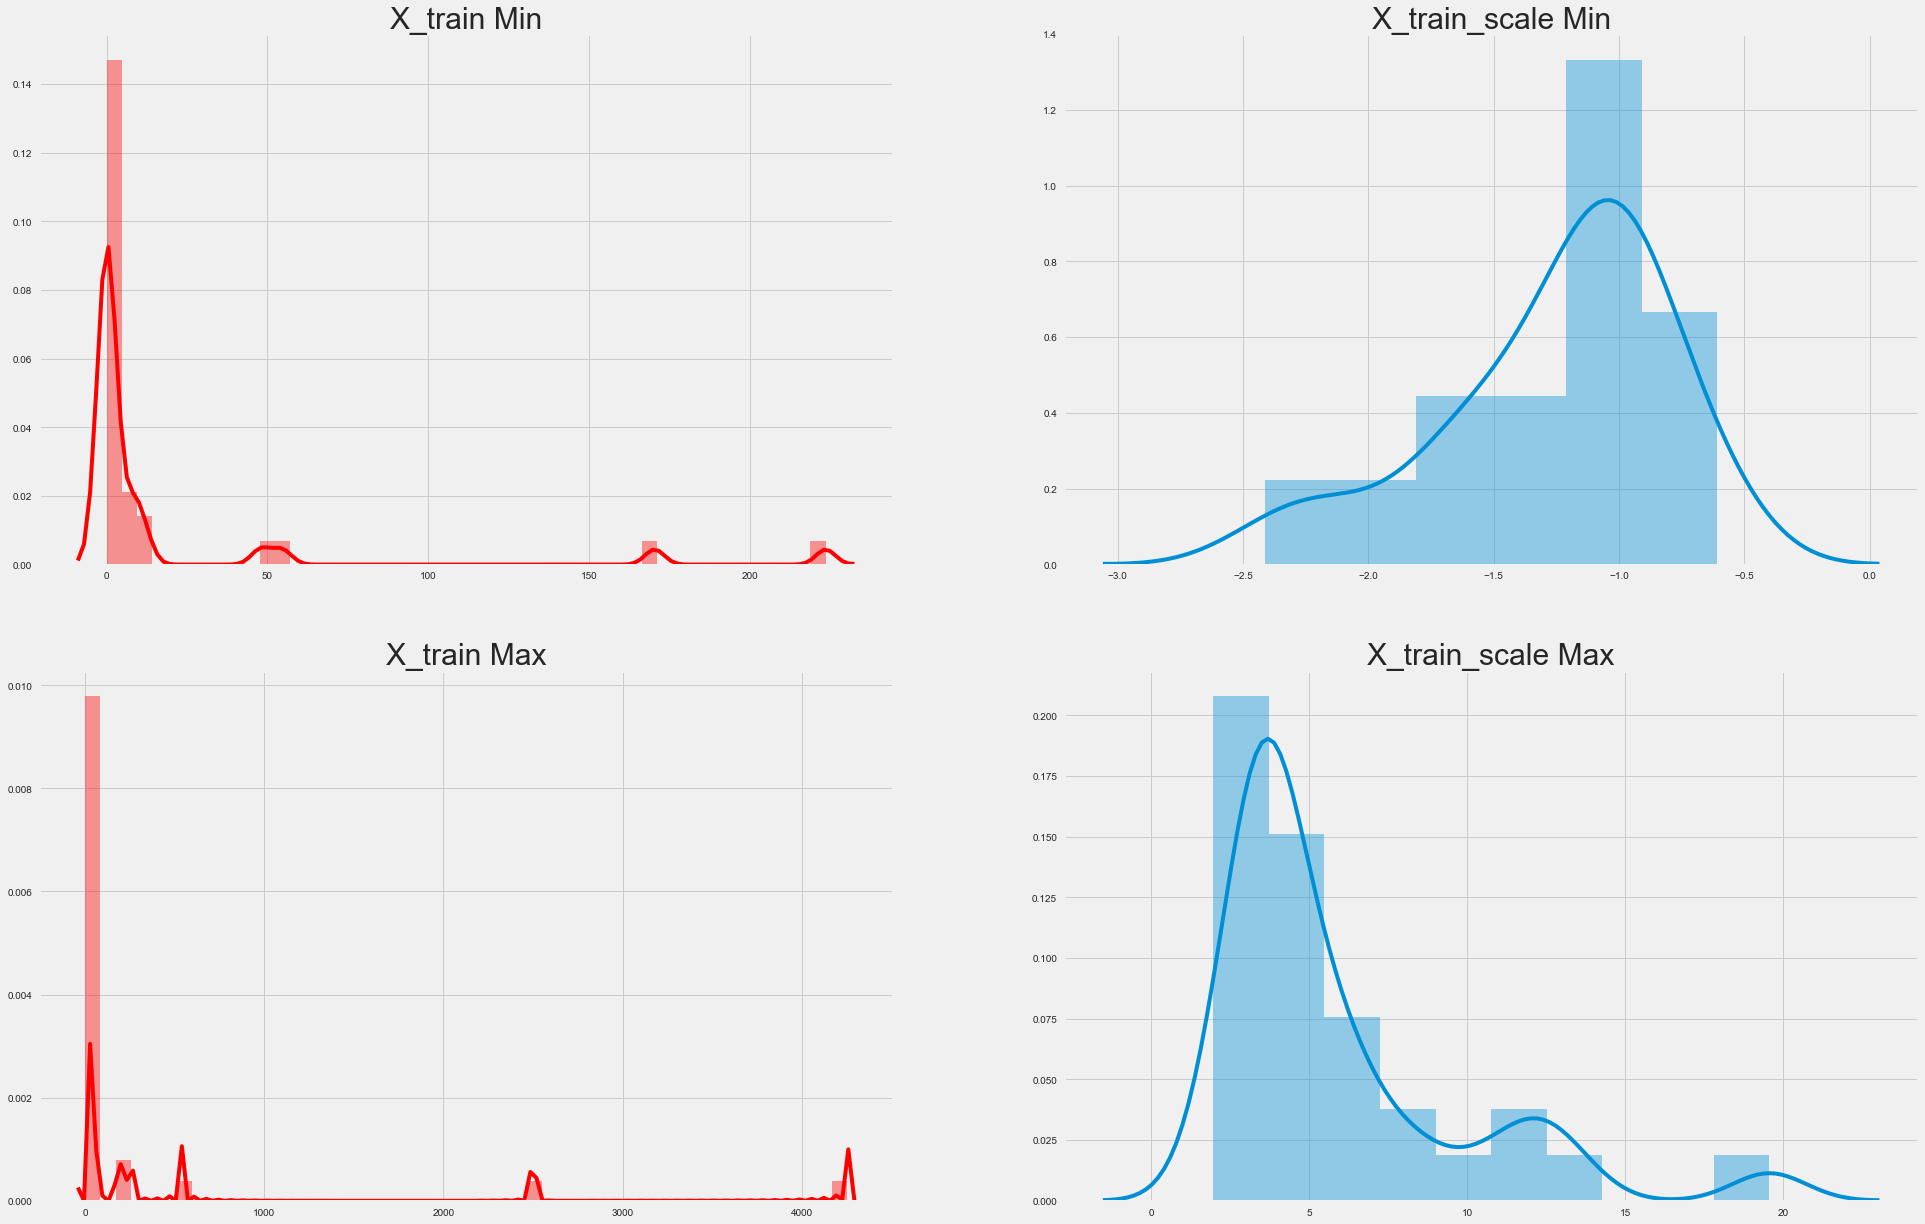

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('X_train Min',size=30)
ax2.set_title("X_train_scale Min",size=30)
ax3.set_title("X_train Max",size =30)
ax4.set_title("X_train_scale Max",size =30)
sns.distplot(X_train.min(axis=0),ax=ax1,color = 'red')
sns.distplot(X_train_scale.min(axis=0),ax=ax2)
sns.distplot(X_train.max(axis=0),ax=ax3,color ='red')
sns.distplot(X_train_scale.max(axis=0),ax=ax4)

## (3) MinMaxScaler Code

In [158]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)

In [159]:
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.317736,0.326383,0.315896,0.210059,0.496261,0.260941,0.211194,0.263305,0.375536,0.276583,...,0.279225,0.364836,0.270085,0.163925,0.412753,0.221424,0.249291,0.398908,0.328290,0.189765
std,0.174164,0.144657,0.174674,0.153603,0.154528,0.160931,0.188455,0.209874,0.134996,0.148323,...,0.176673,0.159514,0.171124,0.141225,0.154148,0.150808,0.186823,0.229277,0.145140,0.117882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194990,0.224636,0.190639,0.105735,0.391018,0.141540,0.069196,0.107987,0.282828,0.169579,...,0.158322,0.249534,0.150081,0.072505,0.312131,0.117016,0.107670,0.224467,0.234285,0.106454
50%,0.281796,0.313662,0.278631,0.166395,0.491224,0.224357,0.150833,0.177236,0.369949,0.251037,...,0.232512,0.358742,0.221875,0.117222,0.401956,0.184349,0.215068,0.347423,0.312046,0.164994
75%,0.405823,0.409959,0.400697,0.266101,0.594757,0.343062,0.309686,0.398655,0.448864,0.355209,...,0.366548,0.469150,0.358828,0.208763,0.502649,0.304945,0.351719,0.559192,0.403957,0.243556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


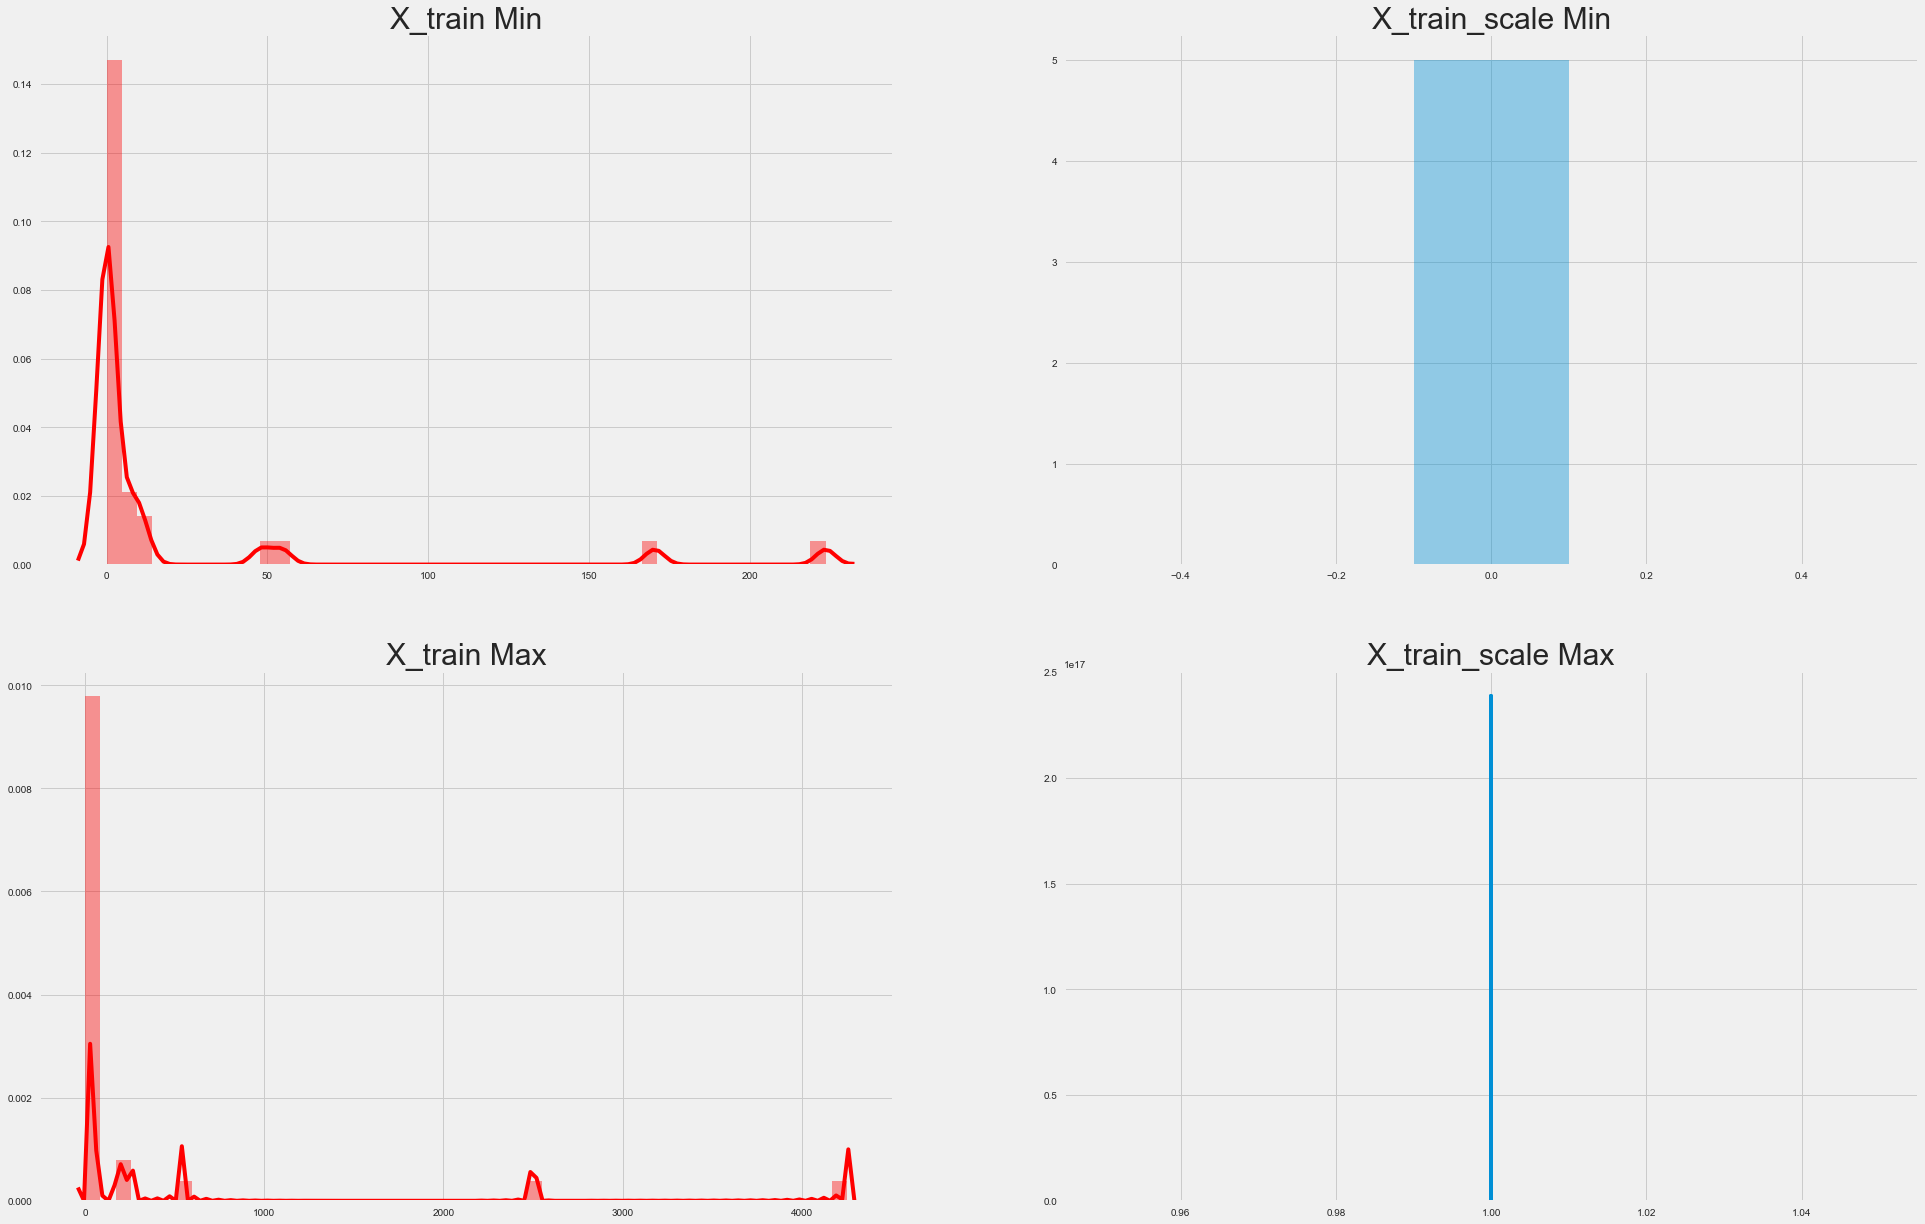

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('X_train Min',size=30)
ax2.set_title("X_train_scale Min",size=30)
ax3.set_title("X_train Max",size =30)
ax4.set_title("X_train_scale Max",size =30)
sns.distplot(X_train.min(axis=0),ax=ax1,color = 'red')
sns.distplot(X_train_scale.min(axis=0),ax=ax2)
sns.distplot(X_train.max(axis=0),ax=ax3,color ='red')
sns.distplot(X_train_scale.max(axis=0),ax=ax4)

## (4) Normalizer Code

In [161]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
X_train_scale = scaler.fit_transform(X_train)

In [162]:
pd.DataFrame(X_train_scale).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.014790,0.021932,0.095670,0.605363,0.000111,0.000109,0.000079,0.000042,0.000209,0.000075,...,0.016693,0.029067,0.109343,0.777431,0.000153,0.000261,0.000260,0.000109,0.000329,0.000098
std,0.003938,0.010793,0.024431,0.044605,0.000055,0.000061,0.000069,0.000023,0.000106,0.000041,...,0.003951,0.014234,0.024760,0.036480,0.000080,0.000171,0.000210,0.000050,0.000159,0.000054
min,0.005512,0.004573,0.037570,0.439373,0.000022,0.000024,0.000000,0.000000,0.000041,0.000011,...,0.007245,0.005154,0.050496,0.696047,0.000027,0.000042,0.000000,0.000000,0.000046,0.000015
25%,0.011705,0.013701,0.076571,0.582811,0.000072,0.000068,0.000039,0.000026,0.000138,0.000045,...,0.013851,0.018157,0.092664,0.751324,0.000098,0.000147,0.000142,0.000078,0.000224,0.000061
50%,0.014937,0.020466,0.096783,0.614354,0.000103,0.000093,0.000067,0.000039,0.000192,0.000068,...,0.016664,0.027112,0.109391,0.770262,0.000141,0.000230,0.000215,0.000103,0.000304,0.000089
75%,0.017361,0.027259,0.111061,0.638024,0.000137,0.000131,0.000105,0.000055,0.000263,0.000094,...,0.019218,0.036995,0.125536,0.799736,0.000188,0.000323,0.000340,0.000134,0.000415,0.000120
max,0.026184,0.086609,0.164570,0.697401,0.000341,0.000503,0.000826,0.000161,0.000693,0.000264,...,0.029544,0.108567,0.185508,0.893240,0.000543,0.001474,0.001652,0.000397,0.000994,0.000445


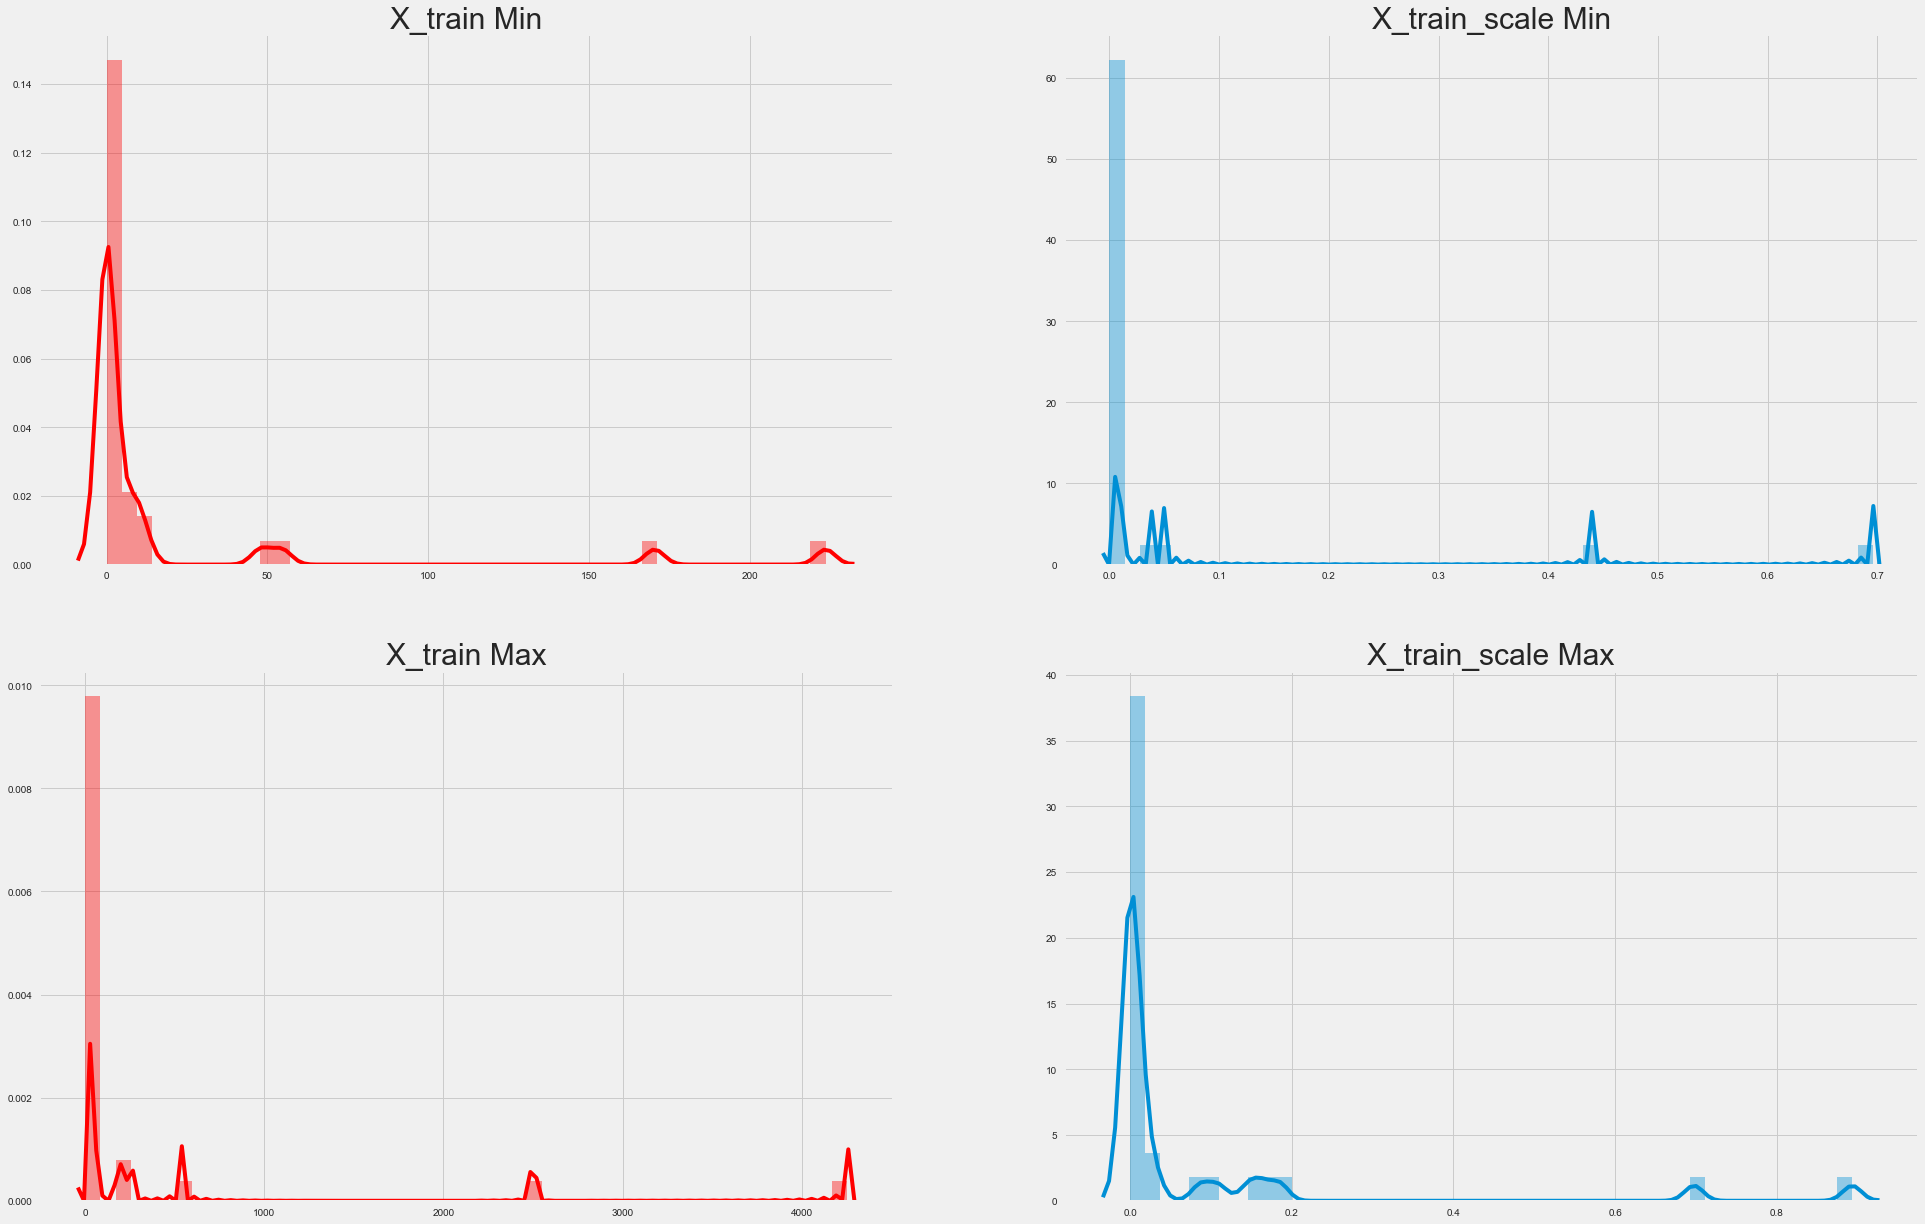

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.set_title('X_train Min',size=30)
ax2.set_title("X_train_scale Min",size=30)
ax3.set_title("X_train Max",size =30)
ax4.set_title("X_train_scale Max",size =30)
sns.distplot(X_train.min(axis=0),ax=ax1,color = 'red')
sns.distplot(X_train_scale.min(axis=0),ax=ax2)
sns.distplot(X_train.max(axis=0),ax=ax3,color ='red')
sns.distplot(X_train_scale.max(axis=0),ax=ax4)

## 3. 적용해보기

In [164]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state =0)
svc = SVC()
svc.fit(X_train,y_train)
print('test accuracy : {:.3f}'.format(svc.score(X_test,y_test)))

test accuracy : 0.629


In [165]:
scalers = {'Standard_Scaler':StandardScaler(),
           'Robust_Scaler': RobustScaler(),
           'Min_Max':MinMaxScaler(),
           'Normalization':Normalizer()}

X_train_scale_SS = scalers['Standard_Scaler'].fit_transform(X_train)
X_train_scale_RS = scalers['Robust_Scaler'].fit_transform(X_train)
X_train_scale_MM = scalers['Min_Max'].fit_transform(X_train)
X_train_scale_No = scalers['Normalization'].fit_transform(X_train)

X_test_scale_SS = scalers['Standard_Scaler'].transform(X_test)
X_test_scale_RS = scalers['Robust_Scaler'].transform(X_test)
X_test_scale_MM = scalers['Min_Max'].transform(X_test)
X_test_scale_No = scalers['Normalization'].transform(X_test)

svc.fit(X_train_scale_SS,y_train)
print('Standard_Scaler test accuracy: {:.3f}'.format(svc.score(X_test_scale_SS,y_test)))
svc.fit(X_train_scale_RS,y_train)
print('Robust_Scaler test accuracy: {:.3f}'.format(svc.score(X_test_scale_RS,y_test)))
svc.fit(X_train_scale_MM,y_train)
print('Min_Max test accuracy: {:.3f}'.format(svc.score(X_test_scale_MM,y_test)))
svc.fit(X_train_scale_No,y_train)
print('Normalization test accuracy: {:.3f}'.format(svc.score(X_test_scale_No,y_test)))

Standard_Scaler test accuracy: 0.965
Robust_Scaler test accuracy: 0.972
Min_Max test accuracy: 0.951
Normalization test accuracy: 0.629
